# **Extracting and Visualizing Stock Data**

# **Description**
Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.

# **Table of Contents**
- Define a Function that Makes a Graph
- Question 1: Use yfinance to Extract Stock Data
- Question 2: Use Webscraping to Extract Tesla Revenue Data
- Question 3: Use yfinance to Extract Stock Data
- Question 4: Use Webscraping to Extract GME Revenue Data
- Question 5: Plot Tesla Stock Graph
- Question 6: Plot GameStop Stock Graph
- Estimated Time Needed: 30 min

Note:- If you are working Locally using anaconda, please uncomment the following code and execute it. Use the version as per your python version.

In [1413]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [1414]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.

In [1416]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Define Graphing Function**
In this section, we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.

In [1469]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard.

Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing functio

# **Question 1**: Use yfinance to Extract Stock Data
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

In [1473]:
tesla_ticker = yf.Ticker("TSLA")

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [1476]:
tesla_data = tesla_ticker.history(period="max")


Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [1479]:
tesla_data.reset_index(inplace=True)
tesla_data.head()
      

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# **Question 2: Use Webscraping to Extract Tesla Revenue Data**
Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named html_data.

In [1482]:
html_data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm").text

Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.

In [1485]:
html_soup = BeautifulSoup(html_data, 'html.parser')

Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue.

Step-by-step instructions

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

Click here if you need help locating the table
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.

In [1549]:
our_table = html_soup.find_all("tbody")[1].find_all('tr')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in our_table:
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

Execute the following line to remove the comma and dollar sign from the Revenue column.

In [1552]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/k1/qzgj_d3j2px13jkp5mxf7xqr0000gn/T/ipykernel_1584/4100834987.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)


Execute the following lines to remove an null or empty strings in the Revenue column.

In [1555]:
esla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

NameError: name 'esla_revenue' is not defined

Display the last 5 row of the tesla_revenue dataframe using the tail function. Take a screenshot of the results.

In [1558]:
tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,
52,2009-09-30,46
53,2009-06-30,27


# **Question 3: Use yfinance to Extract Stock Data**

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [1561]:
yf.Ticker("GME")

yfinance.Ticker object <GME>

Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to "max" so we get information for the maximum amount of time.

In [1564]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")

 **Reset the index** using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.

In [1566]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# **Question 4: Use Webscraping to Extract GME Revenue Data**

Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named html_data_2.

In [1571]:
html_data_2 = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text

Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.

In [1574]:
html_soup_2 = BeautifulSoup(html_data_2, 'html.parser')


Using BeautifulSoup or the read_html function extract the table with GameStop Revenue and store it into a dataframe named gme_revenue. The dataframe should have columns Date and Revenue. Make sure the comma and dollar sign is removed from the Revenue column.

Note: Use the method similar to what you did in question 2.

Click here if you need help locating the table
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


In [1577]:
new_table = html_soup_2.find_all("tbody")[1].find_all('tr')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in new_table:
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True) 
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
/var/folders/k1/qzgj_d3j2px13jkp5mxf7xqr0000gn/T/ipykernel_1584/381332549.py:10: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)


Display the last five rows of the gme_revenue dataframe using the tail function. Take a screenshot of the results.

In [1580]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


# **Question 5: Plot Tesla Stock Graph**
Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.



Hint

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.


In [1583]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (in USD)")
    plt.title(f"{title} Stock Price Until June 2021")
    plt.grid(True)
    plt.legend()
    plt.show()


make_graph(tesla_data, tesla_revenue, 'Tesla').

SyntaxError: invalid syntax (526749211.py, line 14)

In [1585]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (in USD)")
    plt.title(f"{title} Stock Price Until June 2021")
    plt.grid(True)
    plt.legend()
    plt.show()


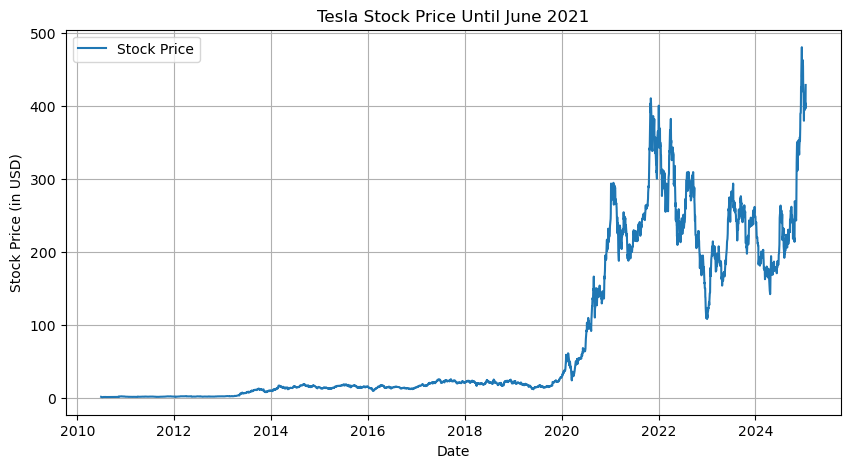

In [1587]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


# **Question 6: Plot GameStop Stock Graph**
Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the make_graph function is make_graph(gme_data, gme_revenue, 'GameStop'). Note the graph will only show data upto June 2021.



In [1537]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='orange')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (in USD)")
    plt.title(f"{title} Stock Price Until June 2021")
    plt.grid(True)
    plt.legend()
    plt.show()


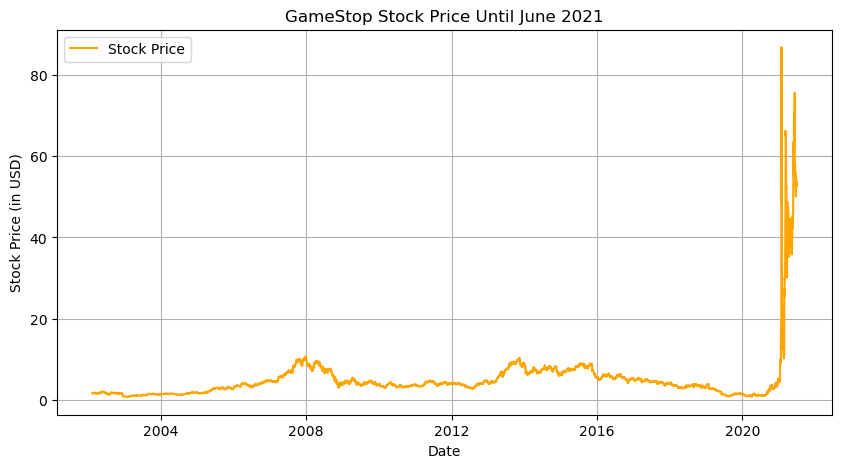

In [1539]:
# Plot GameStop stock graph
make_graph(gme_filtered, gme_revenue, 'GameStop')
